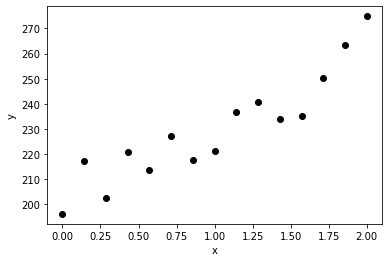

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import emcee
datos=np.load('test_line.npy')

#visualizamos los datos 
xdata = datos[0]
ydata = datos[1]
yerr=datos[2]

plt.plot(xdata, ydata, 'ok')
plt.xlabel('x')
plt.ylabel('y');
plt.show()




In [33]:
#definimos las funciones prior, likelihood y posterior

def log_prior(theta):
    m, b, log_f = theta
    if -1000 < m < 100 and 0.0 < b < 300 and -10.0 < log_f < 1.0:
        return 0.0 #es lo mismo de que devolver la diferencia de las constatnes
    return -np.inf

def log_likelihood(theta, x, y):
    m, b, log_f = theta
    y_model = b + m * x
    sigma = yerr ** 2 + y_model ** 2 * np.exp(2 * log_f)
    return -0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) + (y - y_model) ** 2 / sigma ** 2)

def log_probability(theta, x, y, yerr): #este es el posterior
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [34]:
#definimos los caminadores, numero de parámetros y número de muestreos para la función
ndim = 3  
nwalkers = 50  
nburn = 1000  
nsteps = 2000  

np.random.seed(0)
starting_guesses = np.random.random((nwalkers, ndim))


In [35]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[xdata, ydata])
sampler.run_mcmc(starting_guesses, nsteps);

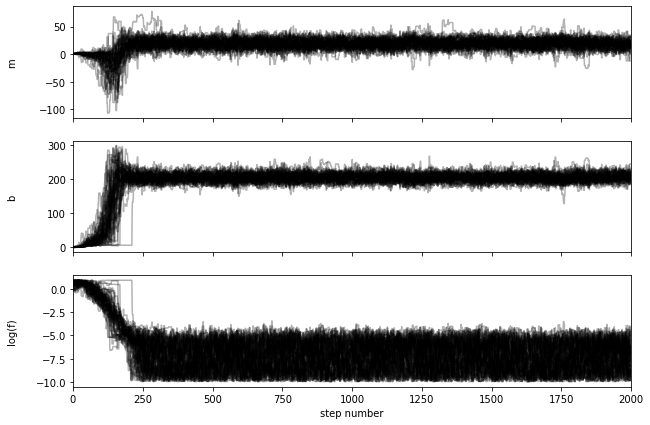

In [36]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["m", "b", "log(f)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");
plt.show()

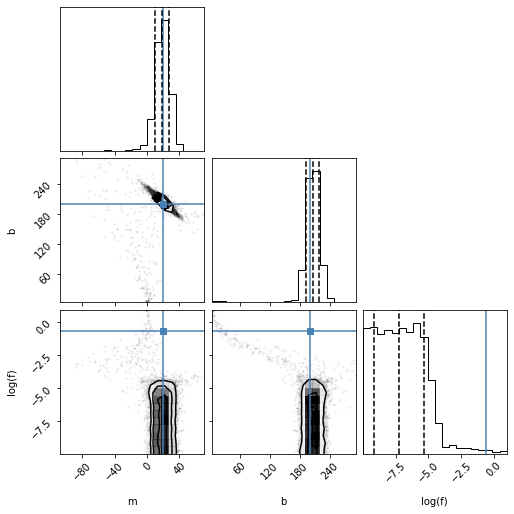

In [37]:
import corner

m_true = 20
b_true = 200
f_true = 0.534


flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

fig = corner.corner(
    flat_samples, labels=labels,quantiles=[0.16, 0.5, 0.84], truths=[m_true, b_true, np.log(f_true)]
);
